In [1]:
import os
import sys

rootpath = os.path.abspath(os.path.join(os.getcwd(), os.path.pardir, os.path.pardir))
sys.path.append(os.path.join(rootpath, "src"))

In [2]:
from transformers import RobertaTokenizer

tokenizer = RobertaTokenizer.from_pretrained("roberta-base")

In [3]:
from sentence_benchmark.data import load_sts12

In [4]:
sts12 = load_sts12(os.path.join(rootpath, "data", "STS", "STS12-en-test"))

In [5]:
def preprocess(example):
    input_ids = tokenizer(example.input, return_attention_mask=False)["input_ids"]
    input_ids1, input_ids2 = input_ids[0], input_ids[1]
    return input_ids1, input_ids2, example.score


examples = [preprocess(x) for x in sts12["MSRpar"]]

In [6]:
import pandas as pd

In [7]:
df = pd.DataFrame(examples, columns=["input_ids1", "input_ids2", "score"])

In [8]:
df.head()

,input_ids1,input_ids2,score
0,"[0, 627, 936, 533, 40, 1266, 31378, 1022, 137,...","[0, 700, 26, 5, 936, 782, 7, 28, 17261, 137, 5...",4.4
1,"[0, 627, 806, 12, 462, 8988, 23473, 5946, 1446...","[0, 627, 4007, 2526, 359, 2129, 128, 29, 1764,...",0.8
2,"[0, 113, 24, 128, 29, 10, 1307, 909, 2295, 215...","[0, 113, 24, 128, 29, 10, 1307, 909, 2295, 215...",3.6
3,"[0, 8584, 2243, 40, 6009, 218, 5618, 1478, 26,...","[0, 113, 939, 206, 89, 128, 29, 10, 745, 2123,...",3.4
4,"[0, 705, 1879, 19724, 327, 1367, 112, 4, 466, ...","[0, 179, 92, 1423, 9657, 2156, 748, 1879, 1972...",1.4


In [9]:
def compute_overlap_proportion(row):
    input_ids1 = set(row["input_ids1"])
    input_ids2 = set(row["input_ids2"])
    return len(input_ids1 & input_ids2) / len(input_ids1 | input_ids2)


df["overlap_proportion"] = df.apply(compute_overlap_proportion, axis=1)

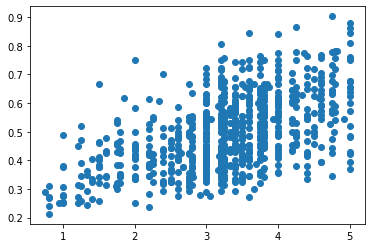

In [10]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.scatter(df["score"].tolist(), df["overlap_proportion"].tolist())

In [18]:
df_pos = df.reset_index()[df["score"] > 4].sort_values(by="overlap_proportion")

In [20]:
df.head()

,input_ids1,input_ids2,score,overlap_proportion
0,"[0, 627, 936, 533, 40, 1266, 31378, 1022, 137,...","[0, 700, 26, 5, 936, 782, 7, 28, 17261, 137, 5...",4.4,0.333333
1,"[0, 627, 806, 12, 462, 8988, 23473, 5946, 1446...","[0, 627, 4007, 2526, 359, 2129, 128, 29, 1764,...",0.8,0.309524
2,"[0, 113, 24, 128, 29, 10, 1307, 909, 2295, 215...","[0, 113, 24, 128, 29, 10, 1307, 909, 2295, 215...",3.6,0.600000
3,"[0, 8584, 2243, 40, 6009, 218, 5618, 1478, 26,...","[0, 113, 939, 206, 89, 128, 29, 10, 745, 2123,...",3.4,0.500000
4,"[0, 705, 1879, 19724, 327, 1367, 112, 4, 466, ...","[0, 179, 92, 1423, 9657, 2156, 748, 1879, 1972...",1.4,0.263158


In [14]:
tokenizer.decode(df_pos.loc[0, "input_ids1"])

'<s>the problem likely will mean corrective changes before the shuttle fleet starts flying again.</s>'

In [15]:
tokenizer.decode(df_pos.loc[0, "input_ids2"])

'<s>he said the problem needs to be corrected before the space shuttle fleet is cleared to fly again.</s>'

In [21]:
df_neg = df.reset_index()[df["score"] <= 2].sort_values(
    by="overlap_proportion", ascending=False
)

In [22]:
df_neg.head()

,index,input_ids1,input_ids2,score,overlap_proportion
8,8,"[0, 179, 1390, 1446, 11, 2287, 2379, 2156, 666...","[0, 179, 2287, 2379, 2156, 6664, 2389, 128, 29...",2.000,0.750000
190,190,"[0, 113, 24, 128, 29, 164, 7, 1369, 2156, 22, ...","[0, 113, 14, 269, 8561, 5, 451, 2156, 380, 86,...",1.500,0.666667
215,215,"[0, 1193, 5347, 9, 1029, 1071, 58, 62, 231, 32...","[0, 1193, 5347, 9, 1029, 1071, 58, 159, 973, 3...",1.846,0.617647
159,159,"[0, 627, 389, 12, 180, 2175, 201, 541, 10884, ...","[0, 627, 389, 12, 180, 2175, 201, 541, 10884, ...",2.000,0.583333
135,135,"[0, 113, 939, 206, 24, 197, 33, 57, 703, 107, ...","[0, 428, 10713, 4533, 5039, 428, 4894, 2156, 1...",1.750,0.540541
